# A small introduction to matplotlib

Matplotlib is a powerfull python data vizualization tool. We'll learn about the basic concepts, and use it to plot a random walk, and a linear regression.<br>
Over the course of this semester, matplotlib plots will be used sparingly for different purposes

<b> 1. Import the needed libraries</b>

In [51]:
!pip install matplotlib
!pip install pandas
!pip install seaborn

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from random import choice

%matplotlib inline

%matplotlib inline is used to specify that Matplotlib should render the plots directly within the Jupyter Notebook interface, allowing you to see the plots as part of your notebook's output

In [25]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

In [53]:
'''We start by arranging the default display settings'''

plt.rc('figure',figsize=(16,10))

plt.rc?

Signature: plt.rc(group: 'str', **kwargs) -> 'None'
Docstring:
Set the current `.rcParams`.  *group* is the grouping for the rc, e.g.,
for ``lines.linewidth`` the group is ``lines``, for
``axes.facecolor``, the group is ``axes``, and so on.  Group may
also be a list or tuple of group names, e.g., (*xtick*, *ytick*).
*kwargs* is a dictionary attribute name/value pairs, e.g.,::

  rc('lines', linewidth=2, color='r')

sets the current `.rcParams` and is equivalent to::

  rcParams['lines.linewidth'] = 2
  rcParams['lines.color'] = 'r'

The following aliases are available to save typing for interactive users:

=====   =================
Alias   Property
=====   =================
'lw'    'linewidth'
'ls'    'linestyle'
'c'     'color'
'fc'    'facecolor'
'ec'    'edgecolor'
'mew'   'markeredgewidth'
'aa'    'antialiased'
=====   =================

Thus you could abbreviate the above call as::

      rc('lines', lw=2, c='r')

Note you can use python's kwargs dictionary facility to store
dicti

<b> 2. Create a list containing all multiples of 3, from 0 to 30</b> 

In [54]:
value = list(range(0,33,3))
value

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30]

<b> 3. Use `plt.plot()` with your list as a parameter. Then use `plt.show()` in the same cell</b> 

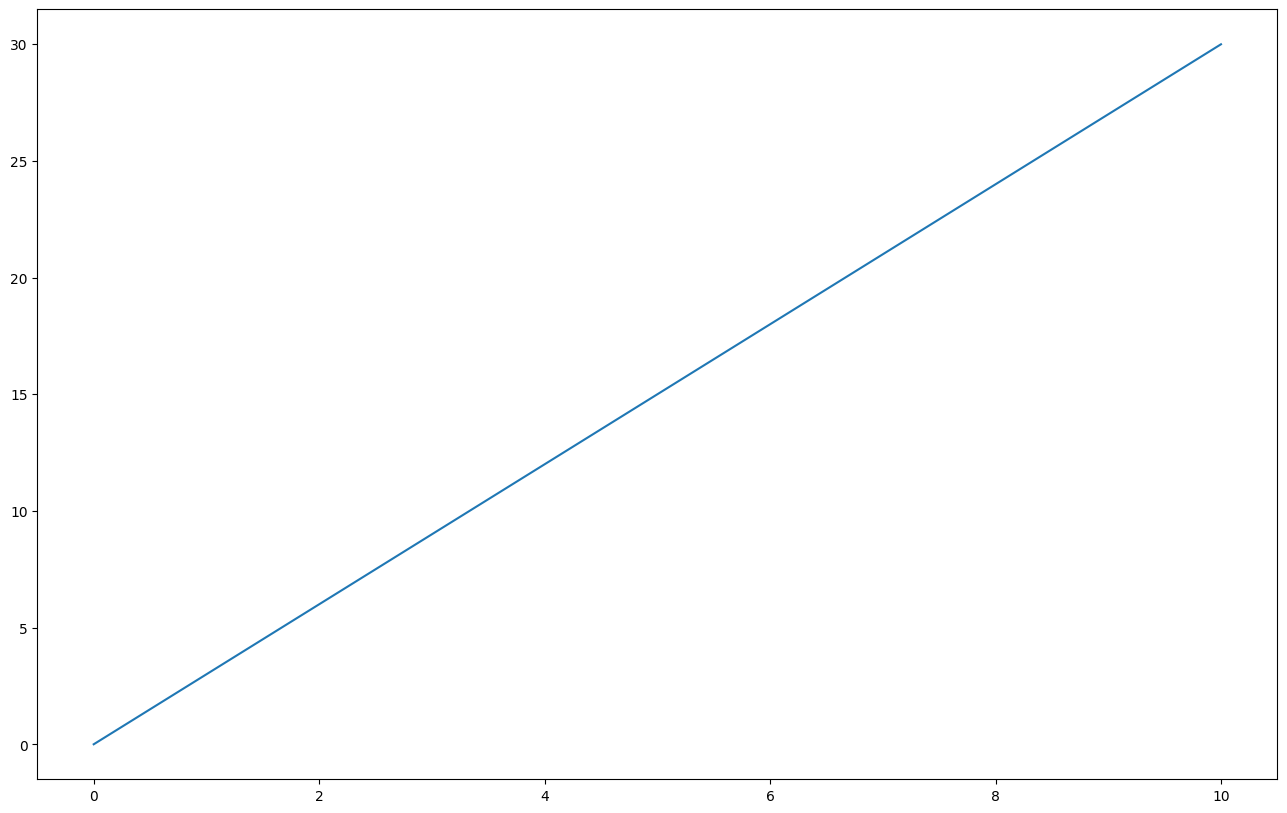

In [55]:
plt.plot(value) 
plt.show() #each value on the list is assigned to y axis, and the x axis corresponds to the index number of the value's position on the list.

As seen here, the list of multiples of 3 shows up as the dependent variable in the graphic. 

But, we can customize the graphic: we can add title, labels for the axis, define the x axis limits.

<b> 3. Create a list containing all numbers with one decimal place or less (0.0,0.1,...), between 0 and 1</b> 

In [22]:
x_axis = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1.0,1.1]
x_axis

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 1.1]

<b> 4. Run the cell below to plot your new graphic</b> 

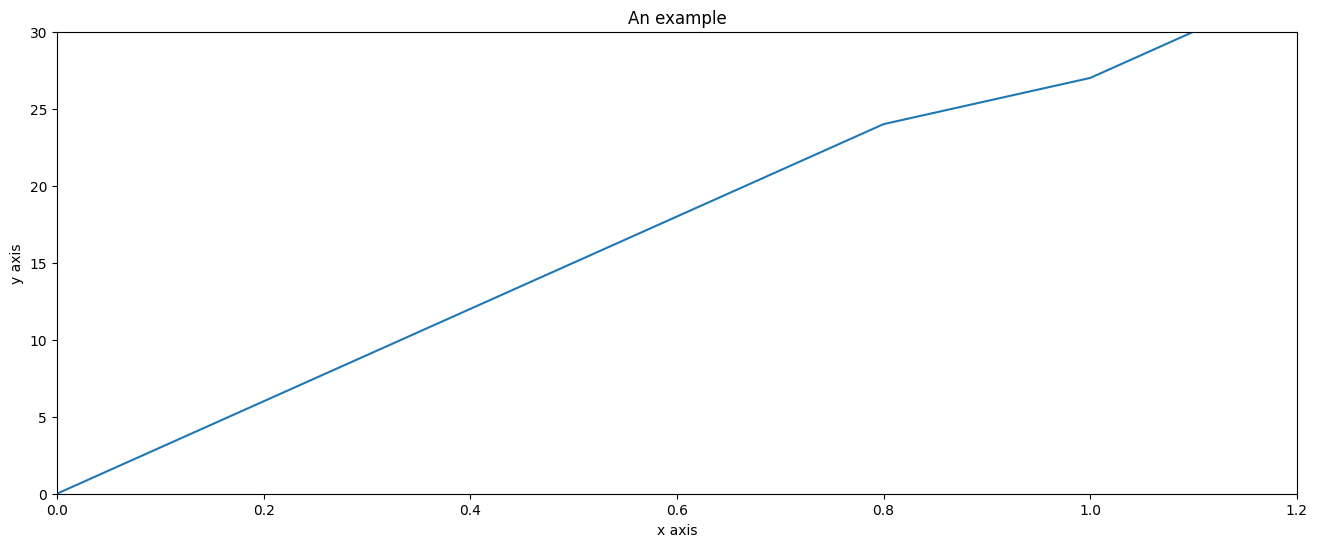

In [23]:
#and now we plot:

plt.plot(x_axis,value) #this goes without saying, but the number of objects in both variables has to be the same.
plt.xlim(0,1.2)
plt.ylim(0,30) 
plt.title('An example')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

<b> 5. Re-run the cell above, but adding the parameter 'ko--' to `plt.plot()`</b> 

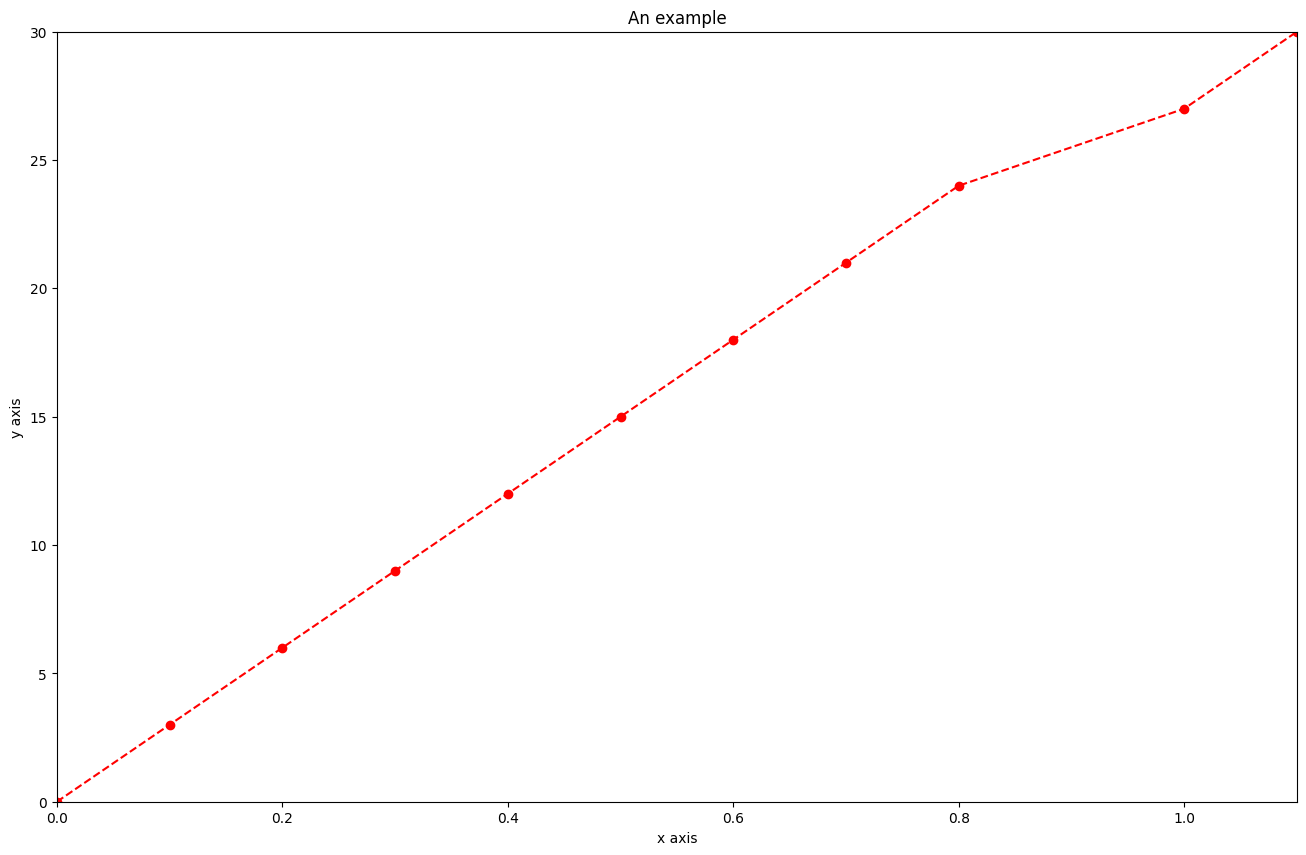

In [74]:
plt.plot(x_axis,value,'ro--') #the introduction of the string ko-- changes the style of the plot. Black dotted line and dots on points.
plt.xlim(0,1.1)
plt.ylim(0,30) 
plt.title('An example')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

## Now, to plot a regression

This regression will only have one variable. First, time to import the data.

<b> 1. Import the `Paris.csv` dataset</b> 

In [91]:
data = pd.read_csv('Paris.csv')
data.head(n=5)



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<b> 2. Save the feature 'rm' as X and the feature 'medv' (the dependent feature) as y</b> 

In [92]:
X = data['rm']
y = data['medv']


<b> 3. Create 2 variables, beta0 and beta1. Set the value of beta0 to 23.94, and the value of beta1 to 17.75</b> 

In [93]:
beta0 = 0
beta1 = 3.5

$$y = \beta_1(x) + \beta_0$$

$$
\int_{\Omega} \text{d}\omega = \int_{\partial\Omega} \omega
$$

$$
\nabla f = \lambda \nabla \varphi
$$

$$
p\{X \in B\}=\sum_{x \in B} q(x)
$$

<b> 4. Run the cell below to create the predictions for our linear regression, and to plot its graphic</b> 

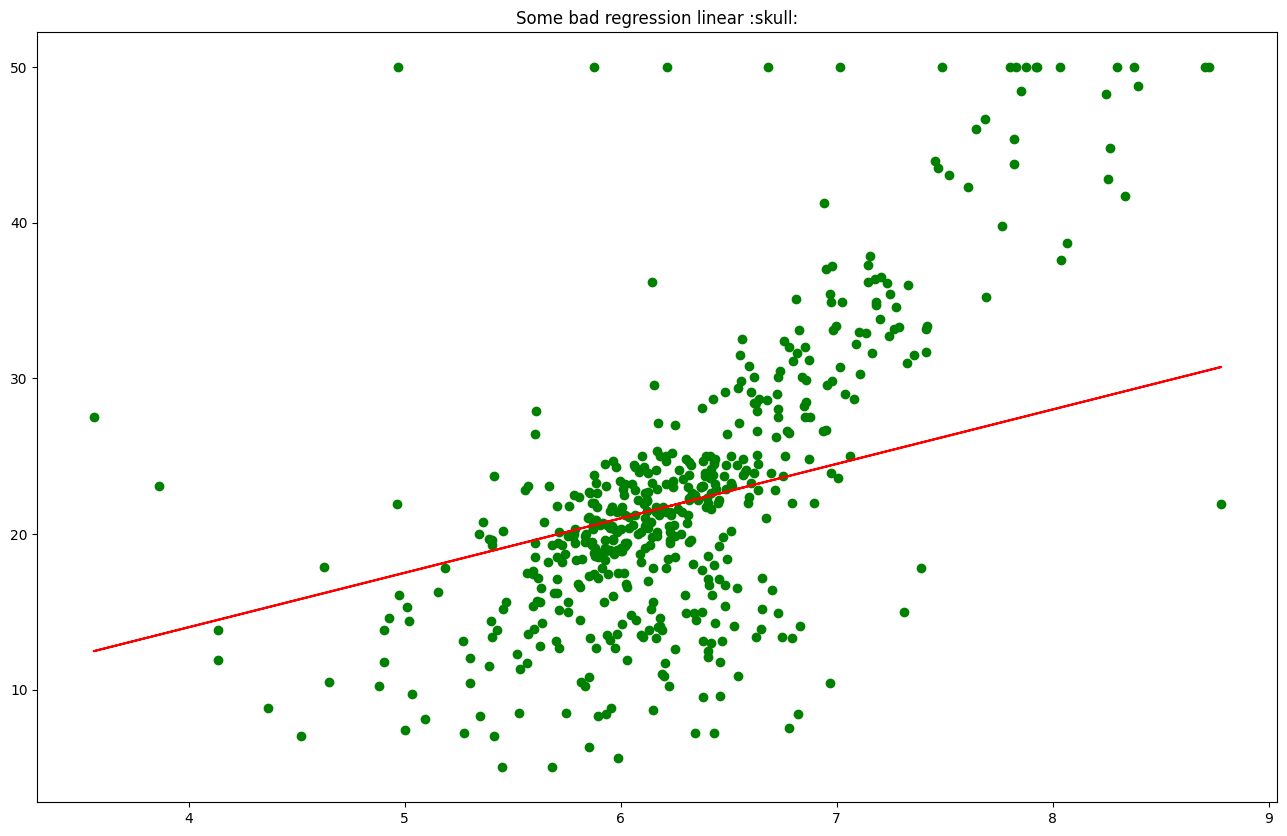

In [95]:
predictions = []

for value in X:
    predictions.append(beta0 + beta1*value)

fig = plt.figure() 
plt.plot(X, y, 'g.', markersize=12)
plt.plot(X, predictions, 'r-')
plt.title("Some bad regression linear :skull:")
plt.show()

## Now for the random walk:

A random walks is a random process. To each step of the walk, we assign possible different outcomes with a certain probability. The outcome of each step is independent of the outcome of the previous ones. The end result is given by the series of the outcomes of each step.

So, we can understand a random walk as a series of random steps. 

First, let's define the possible outcomes:

In [100]:


steps = [-1,1] # the possible outcomes from each step are 1 and -1
step_choice = choice(steps) # on each step, the choice function on the random library decides which one will be made
#for this example -1 or 1 have the same chance
step_choice

1

In [106]:
walk = []
walk.append(step_choice)
for step in range(1,1000):
    following = walk[step-1] + choice(steps)
    walk.append(following)
    #print(walk)

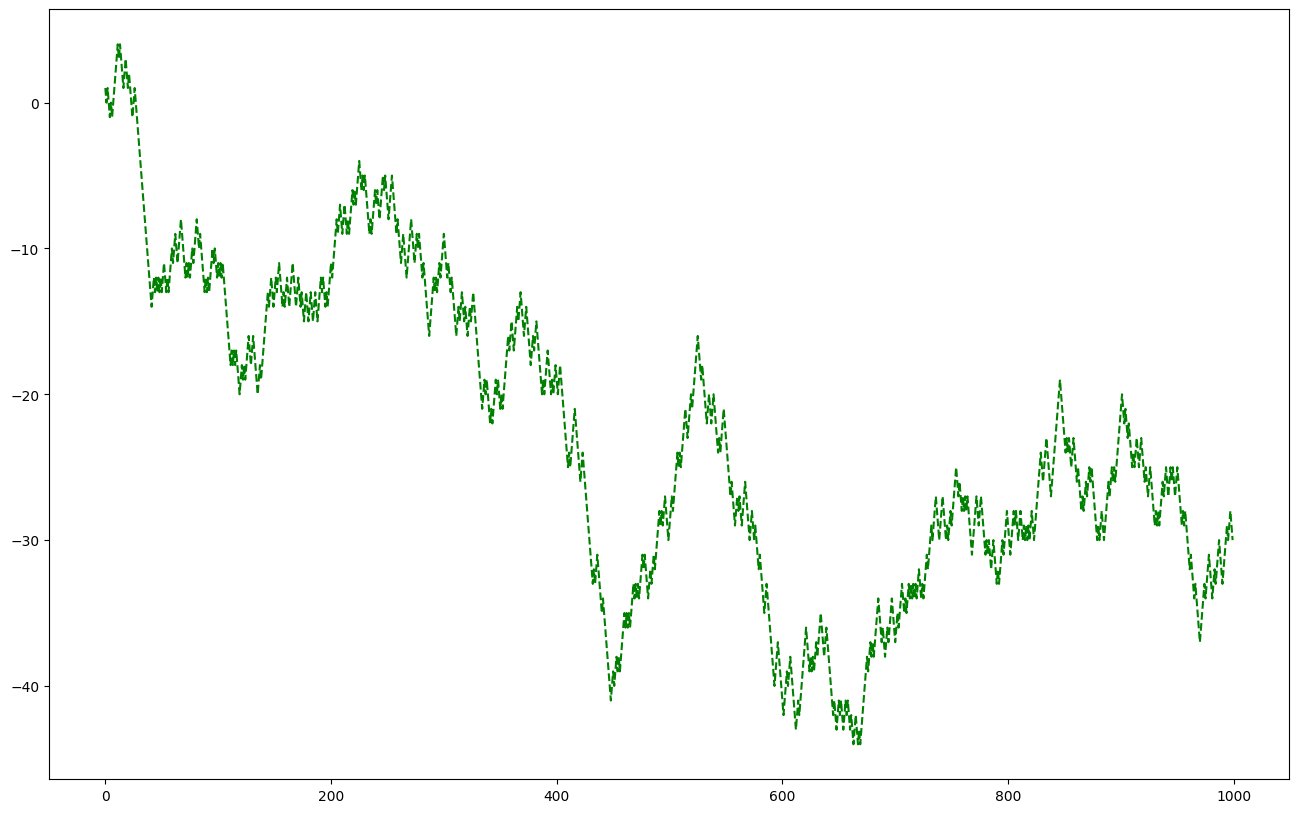

In [107]:
plt.plot(walk,'g--')
plt.show()

We can create a function that does this automatically by using as input the number of steps we want it to give and have it return the plot:

In [108]:
def r_walk(step_num,col='b-'):
    walk = []
    step_choice = choice([-1,1])
    walk.append(step_choice)
    for step in range(1,step_num):
        step_choice_2 = choice([-1,1])
        next_step = walk[step-1] + step_choice_2
        walk.append(next_step)
        
    plt.plot(walk,col)
    plt.xlim(0,step_num)
    plt.title('Your random walk')
    plt.xlabel('Number of steps')
    plt.ylabel('Random Walk result')
    plt.show()

In [109]:
#print(walk)

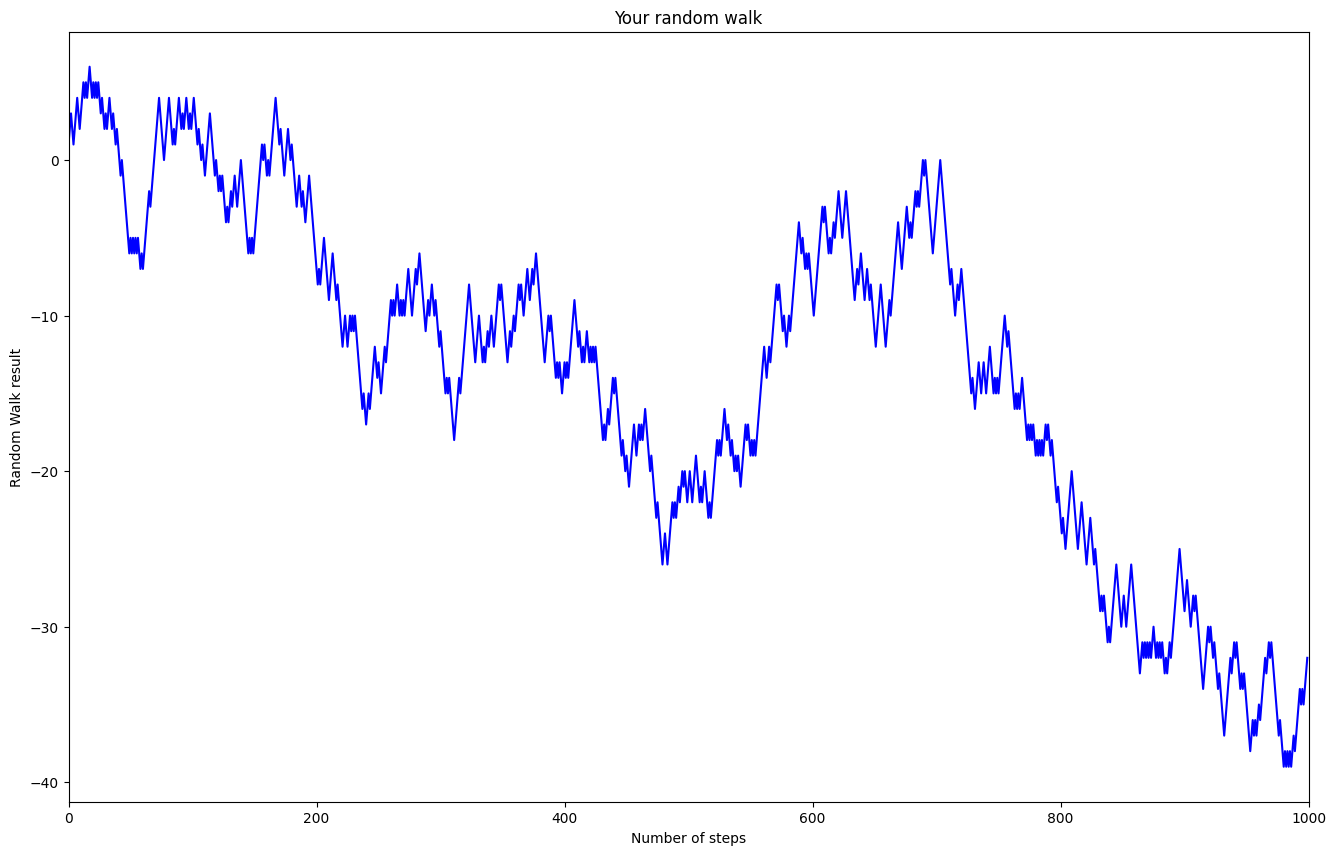

In [110]:
r_walk(1000)

But, we can take it a little step further, we can actually make a function that plots several random walks at the same time, all with different colors:

In [111]:
def multiple_walks(n,step_num):
    col_list = ['g.','r-','b--']
    for i in range(n):
                     
        r_walk(step_num,col=col_list[i]) #for each n, plot a different r_walk function and display it on a graph. However, can we be more elegant.
    
        

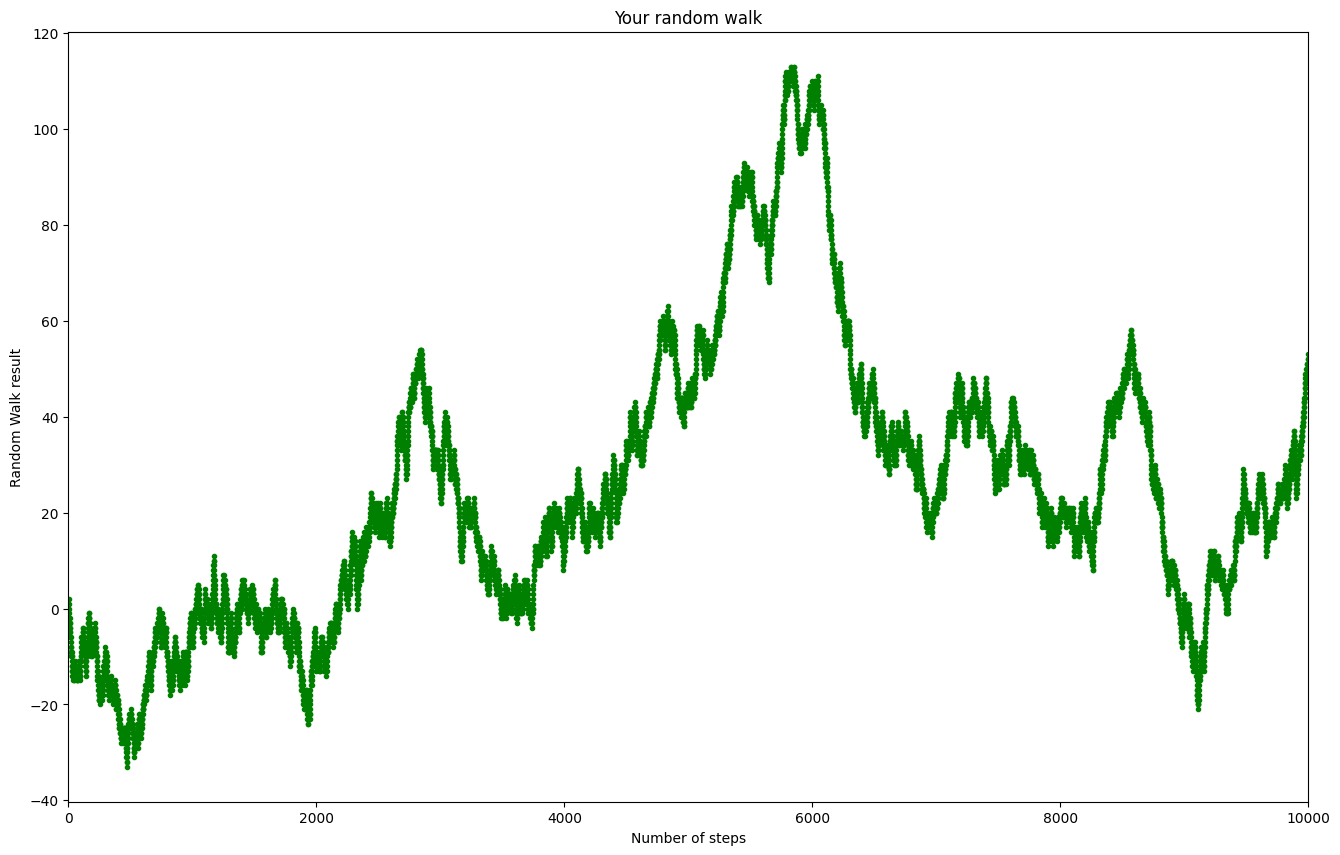

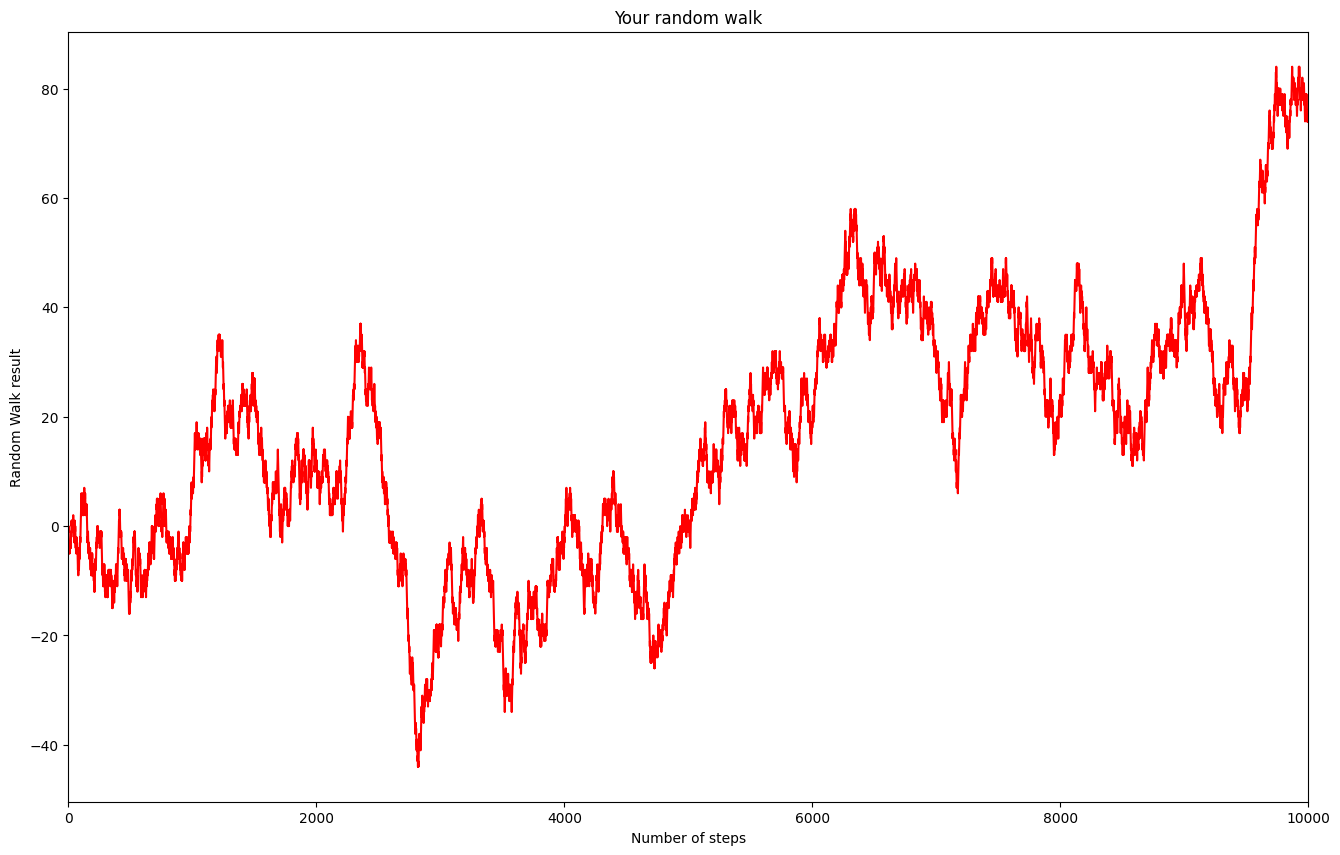

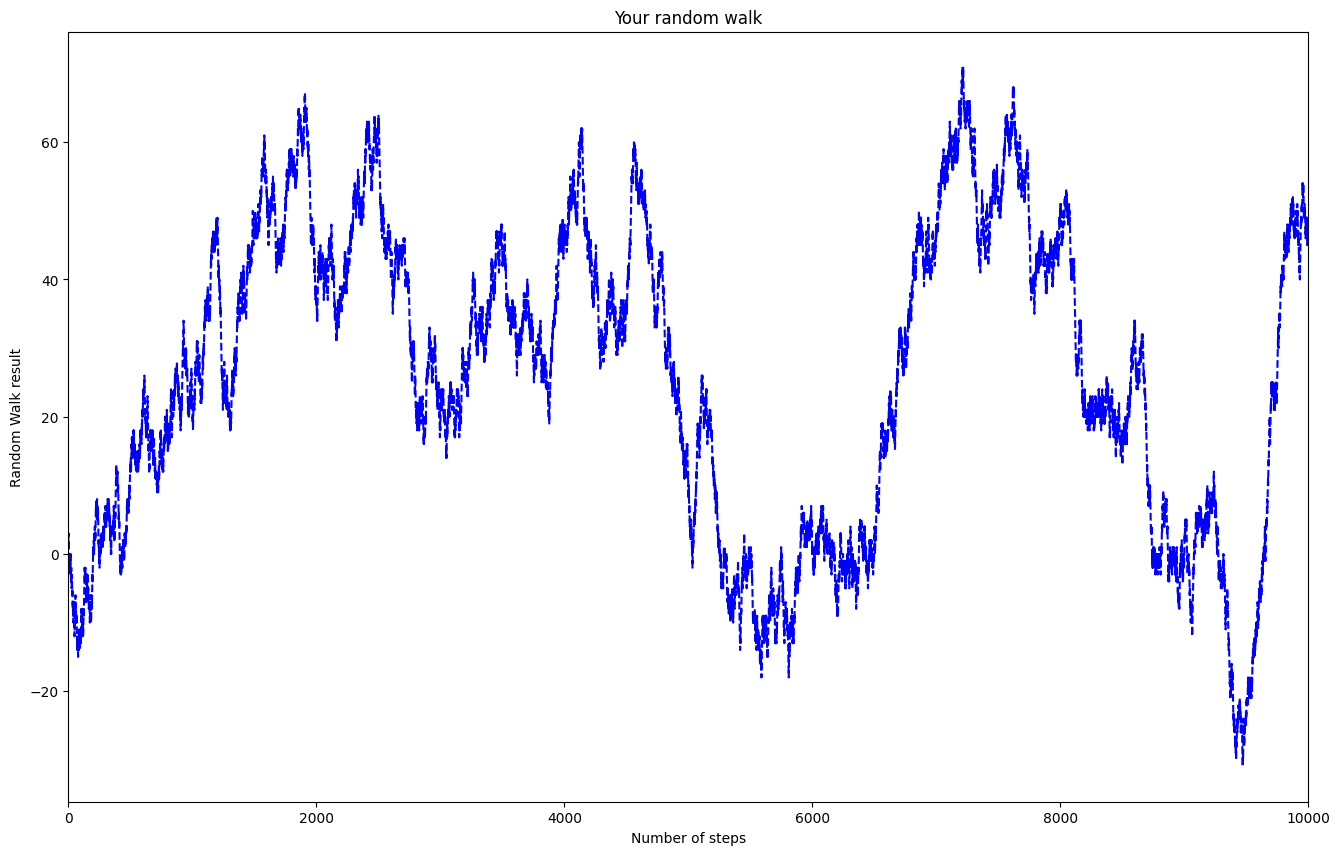

In [112]:
multiple_walks(3,10000) 

In [113]:
#let's grab our previous r_walk function, remove the plotting and call it r2_walk:

def r2_walk(step_num):
    walk = []
    step_choice = choice([-1,1])
    walk.append(step_choice)
    for step in range(1,step_num):
        step_choice_2 = choice([-1,1])
        next_step = walk[step-1] + step_choice_2
        walk.append(next_step)
    return walk #but now, in order to have an output, we need the function to return a result   
   

In [114]:
#now, we create a function that plots only after obtaining all lists:

def multiple2_walk(n,step_num):
    final_list = list(range(1,n+1))
    
    for i in range(0,n):
        x = list(range(1,step_num+1))
        
        plt.plot(x,r2_walk(step_num),label = 'Plot number' + ' ' + str(final_list[i])) #we use r2_walk as y axis
        plt.title('Your random walk')
        plt.xlabel('Number of steps')
        plt.ylabel('Random Walk result')
        plt.legend(loc='lower left')
    plt.show()

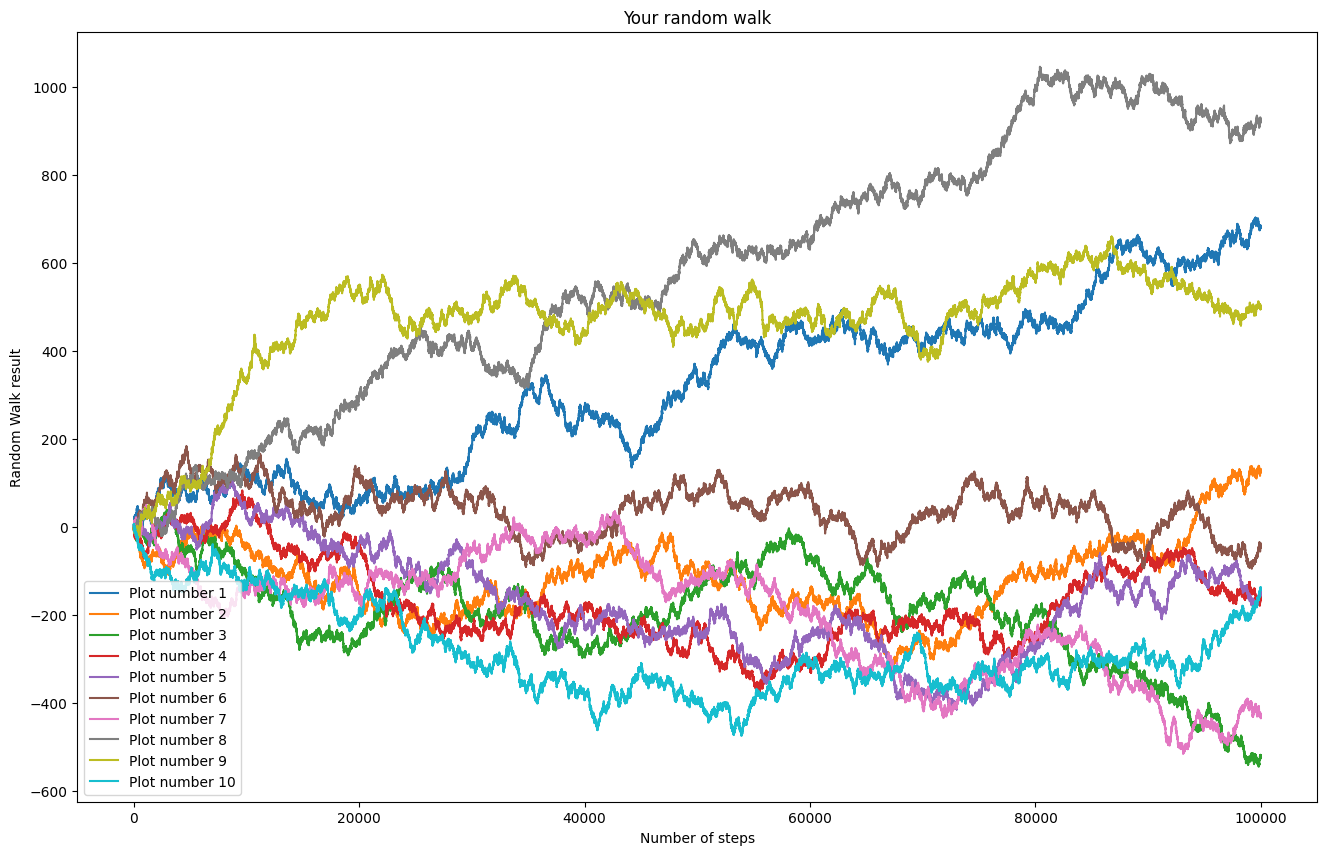

In [115]:
multiple2_walk(10,100000)

## A bar plot

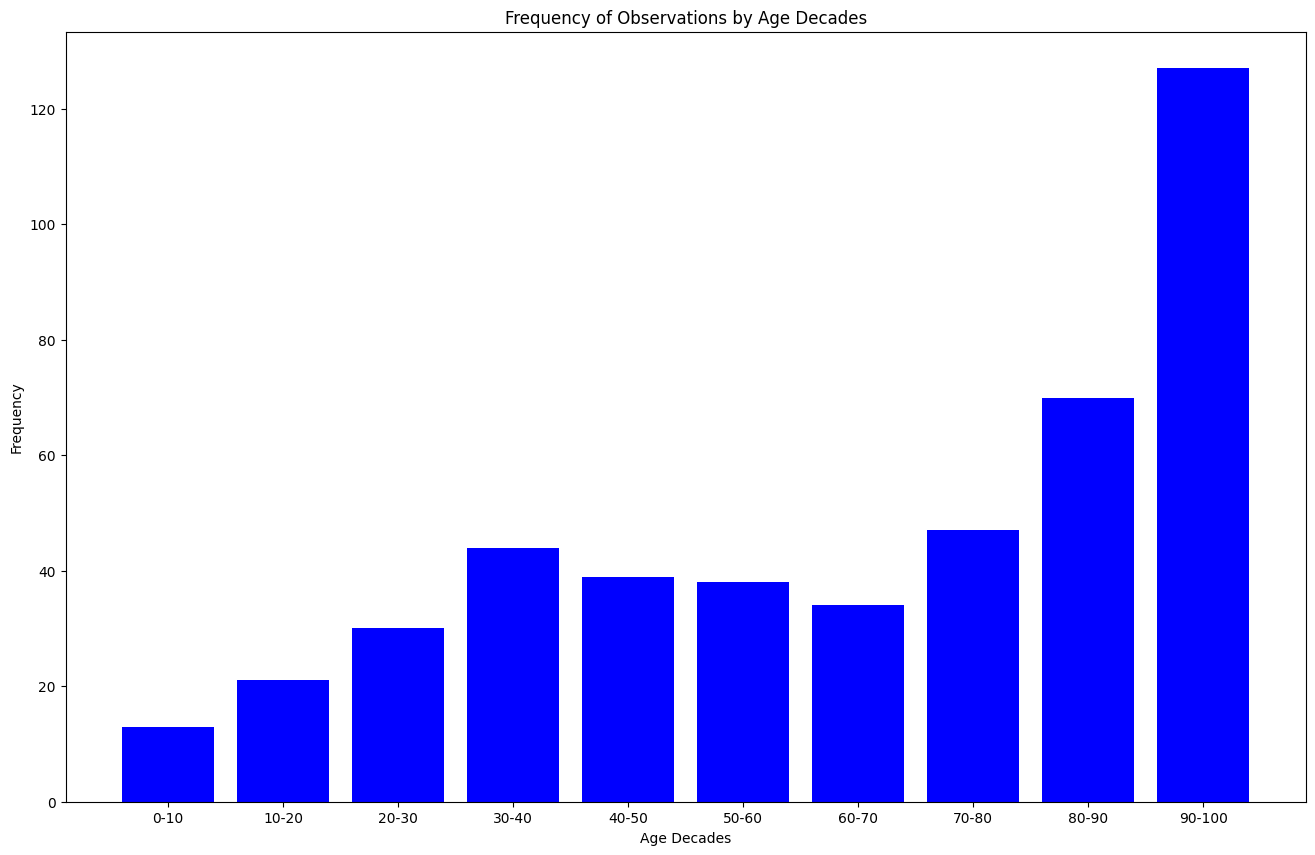

In [116]:
# Define age groups and corresponding labels
age_groups = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90','90-100']

# Create age groups in decades using pd.cut
data['age_group'] = pd.cut(data['age'], bins=age_groups, labels=age_labels, right=False)

# Calculate the frequency of observations in each decade
age_group_counts = data['age_group'].value_counts().sort_index()

# Create a bar plot
plt.bar(age_group_counts.index, age_group_counts.values, color='blue')

# Add labels and a title
plt.xlabel('Age Decades')
plt.ylabel('Frequency')
plt.title('Frequency of Observations by Age Decades')

# Show the plot
plt.show()


The <b> pd.cut() </b> function essentially takes the values in the 'age' column, checks which bin or age group they belong to based on the specified boundaries and labels, and assigns the corresponding label to each value in the new 'age_group' column. This way, you create a categorical variable representing the age groups or decades for each observation in your dataset.

## Histogram Examples

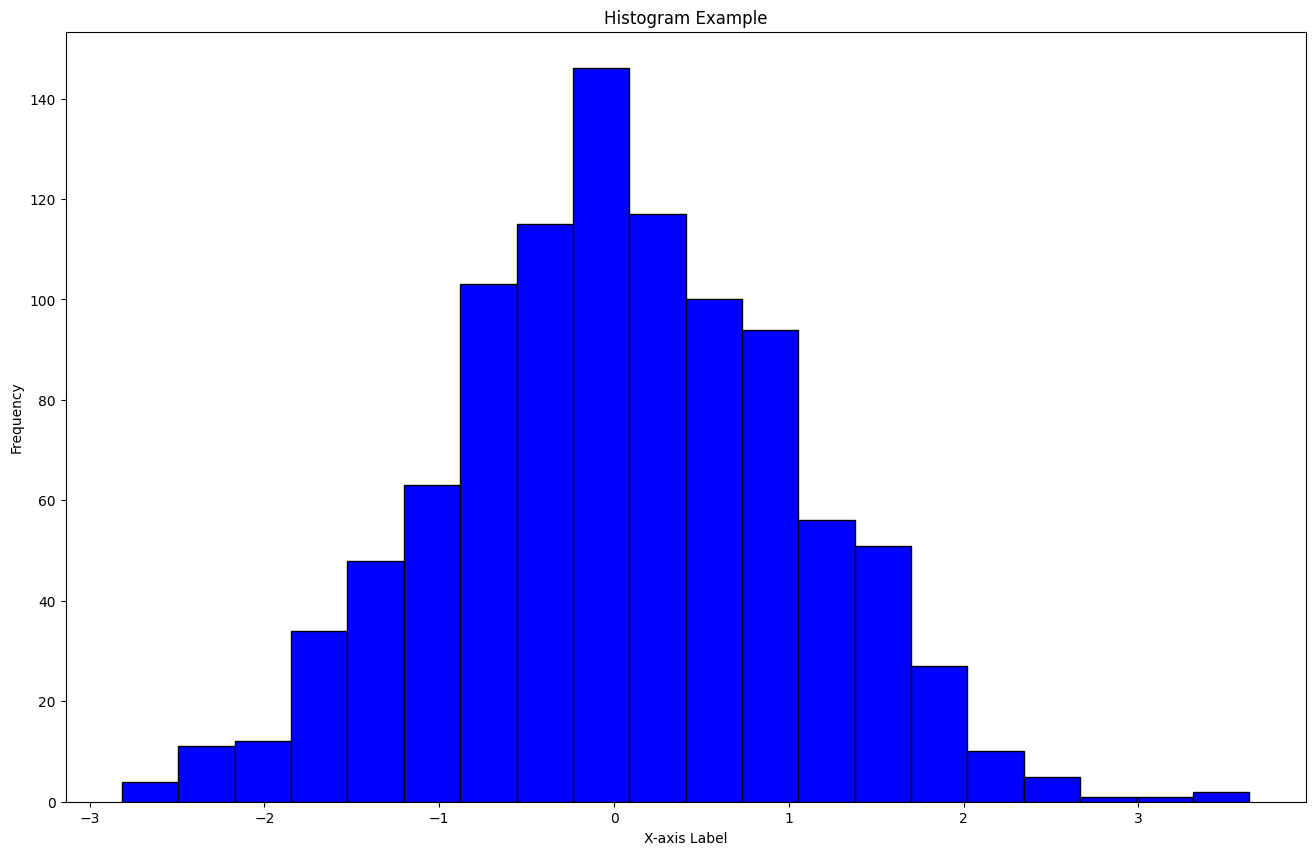

In [117]:
import numpy as np

# Generate random data for the histogram
data = np.random.randn(1000)  # You can replace this with your own dataset

# Create a histogram
plt.hist(data, bins=20, color='blue', edgecolor='black')

# Add labels and a title
plt.xlabel('X-axis Label')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Display the histogram
plt.show()


In [123]:
import seaborn as sns

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Display the dataset as a Pandas DataFrame
print(iris)


     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


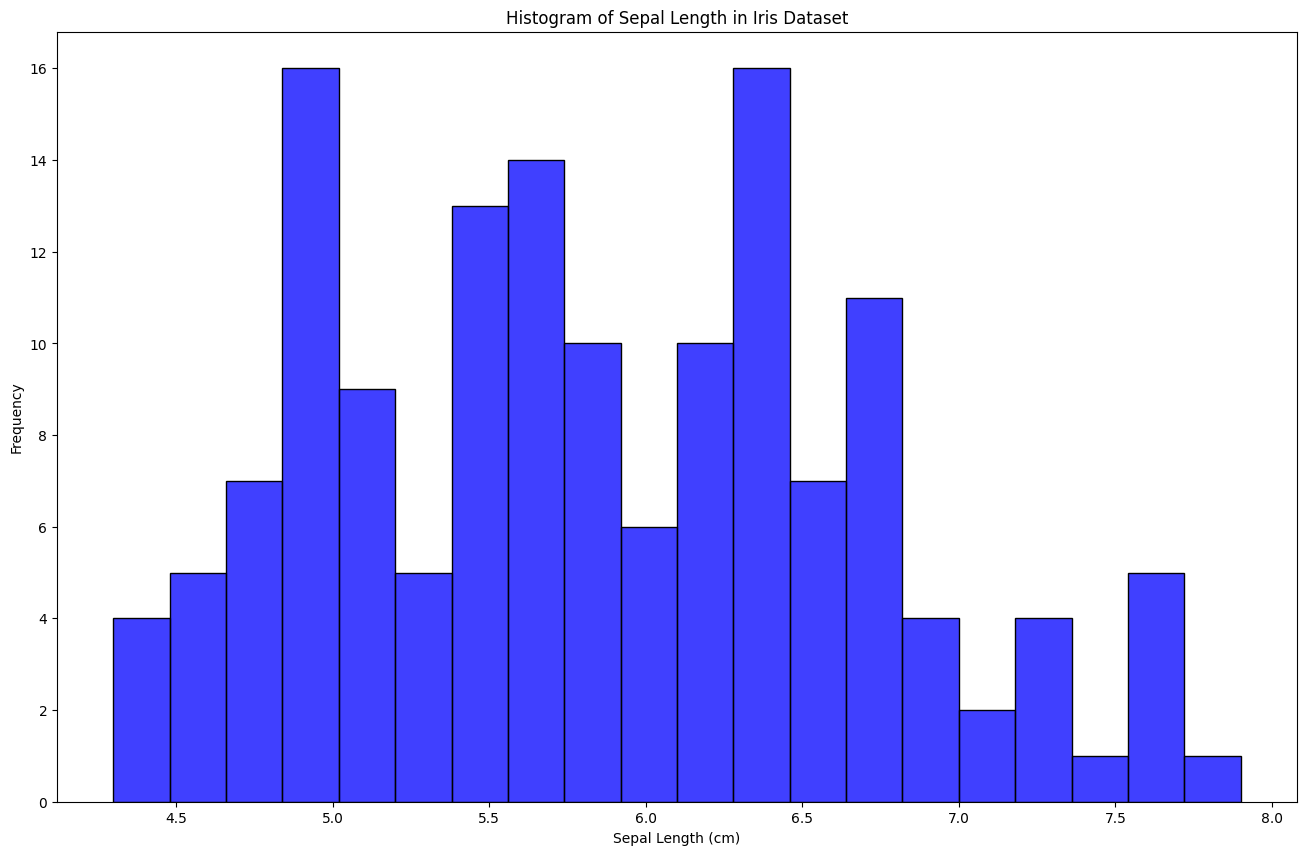

In [124]:
# Create a histogram for a specific column of the dataset
sns.histplot(data=iris, x='sepal_length', bins=20, color='blue', edgecolor='black')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length in Iris Dataset')
plt.show()


## Correlation Heatmap

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


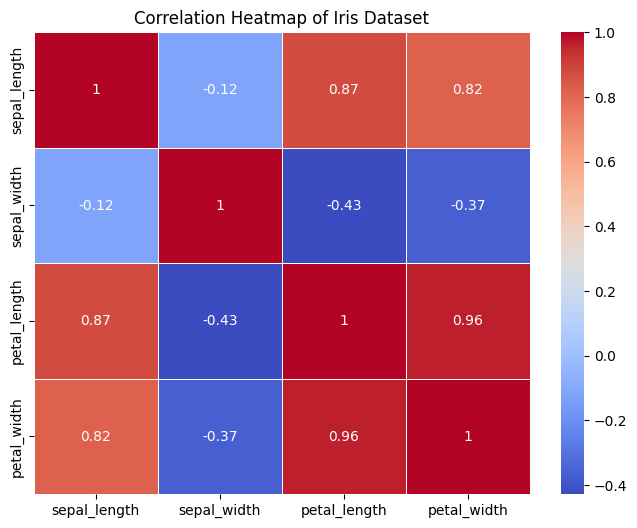

In [140]:
# Compute the correlation matrix
iris2 = iris.drop("species", axis=1)
correlation_matrix = iris2.corr()
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()


## Extra -  Siepirsky triangle

Now , we take this a little step further in the Siepirsky triangle. In essence, the Siepirsky triangle is no more than a random walk. However, instead of having plain values as outcomes, the outcomes are now simple equations. 

We start a point (0,0):

Then, we will have 3 different pairs of equations to apply to the point's position. However, all pairs work the same way:

x(n) = equation x(n-1)
y(n) = equation y(y-1)

For every step, the pair of equations to apply is chosen randomly.
after n steps, the function returns a final position and we can plot the path to that position.

##### First transformation                                                        $x_{n+1} = 0.5x_{n}\\
                                                    y_{n+1} = 0,5y_{n}$
                                                                       
                                                                       
##### Second transformation                                                   $x_{n+1} = 0.5x_{n} + 0.5\\
                                                    y_{n+1} = 0.5y_{n} + 0.5$
                                                     
                                                     
##### Third transformation                                                         $x_{n+1} = 0.5x_{n} + 1\\
                                                    y_{n+1} = 0.5y{n}$

In [158]:
#define the possible transformations
def trans_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.5 * x
    y1 = 0.5 * y
    return x1,y1

def trans_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.5 * x + 0.5
    y1 = 0.5 * y + 0.5
    return x1,y1

def trans_3(p):
    x = p[0]
    y = p[1]
    x1 = 0.5 * x + 1
    y1 = 0.5 * y
    return x1,y1

#arrange the transformations assign a and b as the starting point
transformations = [trans_1,trans_2,trans_3]
a1 = [0]
b1 = [0]
a,b = 0,0
 
for i in range(50000):
    trans = choice(transformations)
    a,b = trans((a,b))
    a1.append(a)
    b1.append(b)

In [159]:
plt.rc('figure',figsize = (16,16))

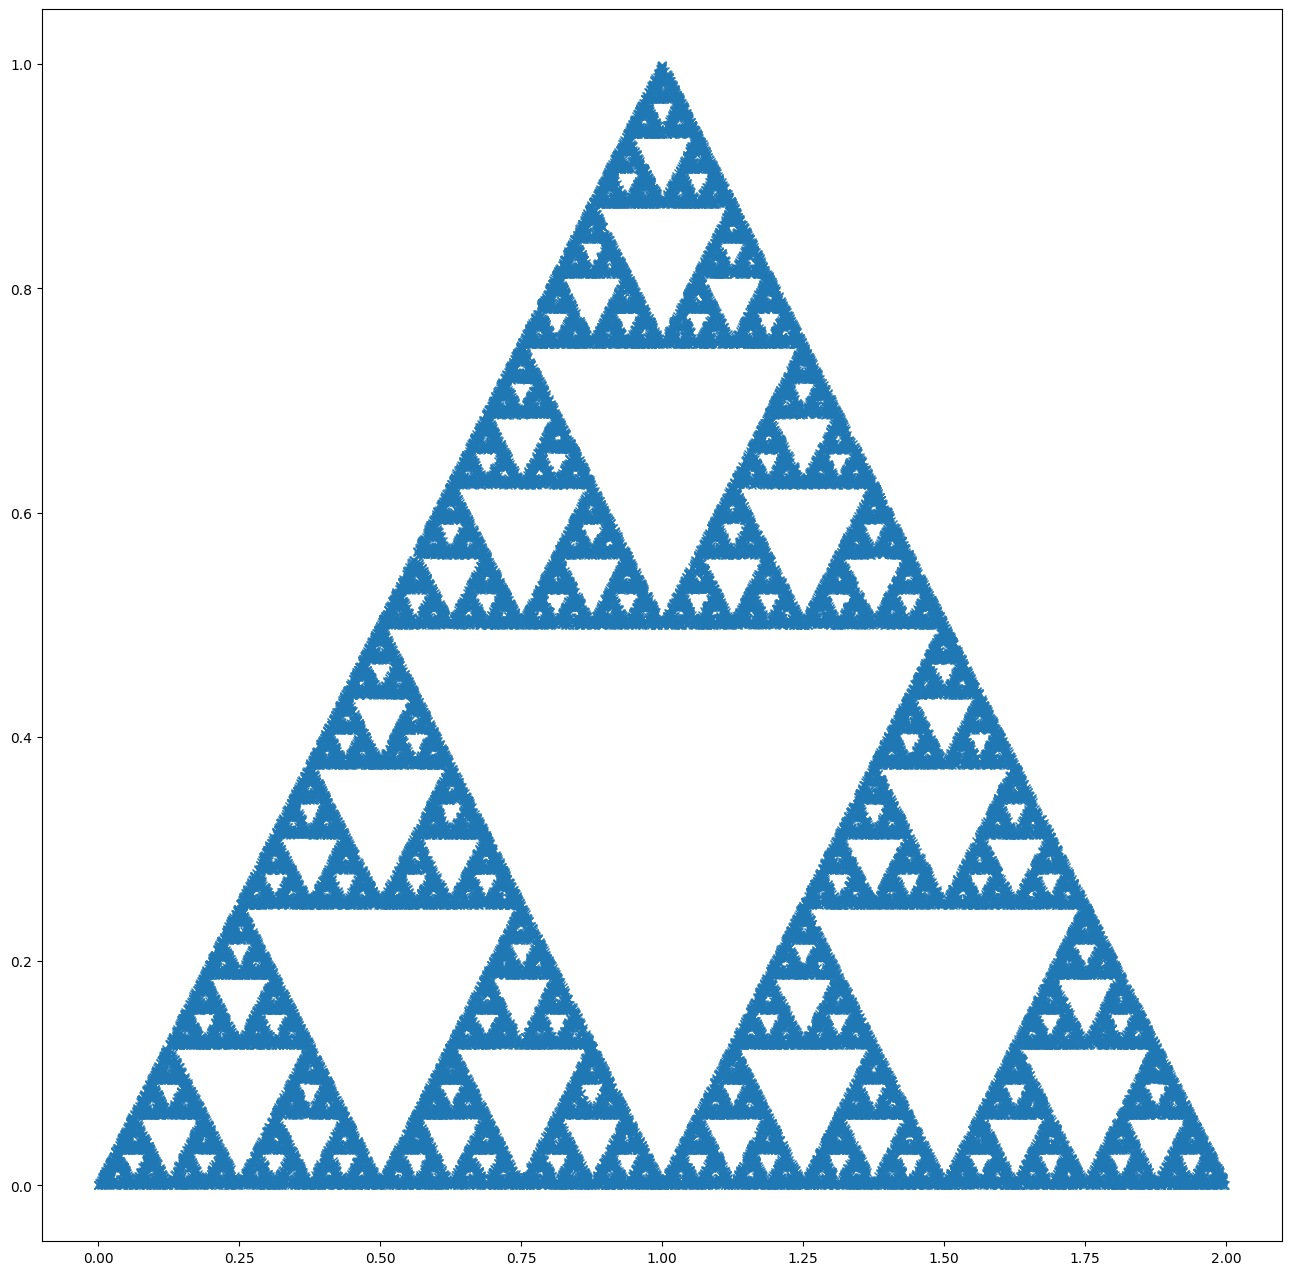

In [162]:
#plot the a graph with both lists, with only dots

plt.plot(a1,b1,'x')
plt.savefig('my_figure.png')
plt.show()